In [4]:
import numpy as np
from matplotlib import pyplot as plt

See notes for definitions of fourier series, the foruier convergence theorem etc. 
This notebook applies the fourier series to a positive square wave, defined as:

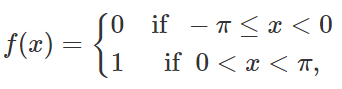

In [5]:
def square(x, period):
    
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]/(period)) % 1 < 0.50: # if the remainder of the value of x divided by its period is less than 0.5, the value of y should be 1
            y[i] = 1.0 # creates discrete values of 0 and 1 in the y array. this creates the square pattern of a square wave
    return y 

N = 1000
x = np.linspace(-10.0, 10.0, N)

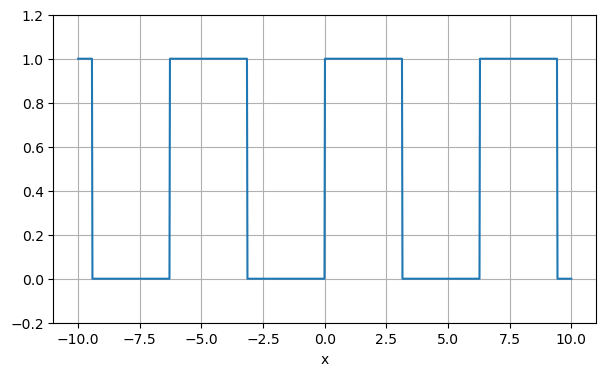

In [7]:
plt.figure(figsize=(7,4))
plt.plot(x, square(x, 2*np.pi))
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.xlabel('x')
plt.show()

Express the square wave as a Fourier Series, using the coefficients for A0, An and Bn (see paper notes for more information on the mathematics)

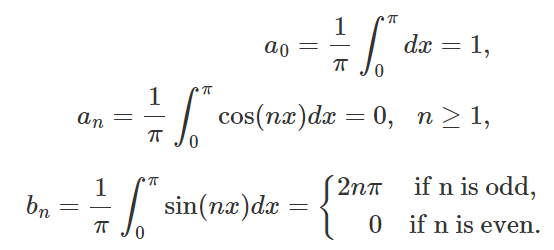

In [9]:
#Define cos and sin terms of the Fourier series
def cosTerm(n):
    #always zero except for n=0
    if n==0: return 1.0
    return 0

def sinTerm(n):
    if n%2: 
        ret = 2/(n * np.pi)
    else:
        ret = 0
    return ret

def fourier(n, x):
    sum = cosTerm(0)/2.0 * np.ones(len(x))
    
    for i in range(1, n+1):
        sum += sinTerm(i)*np.sin(i*x) + cosTerm(i)*np.cos(i*x)
    return sum

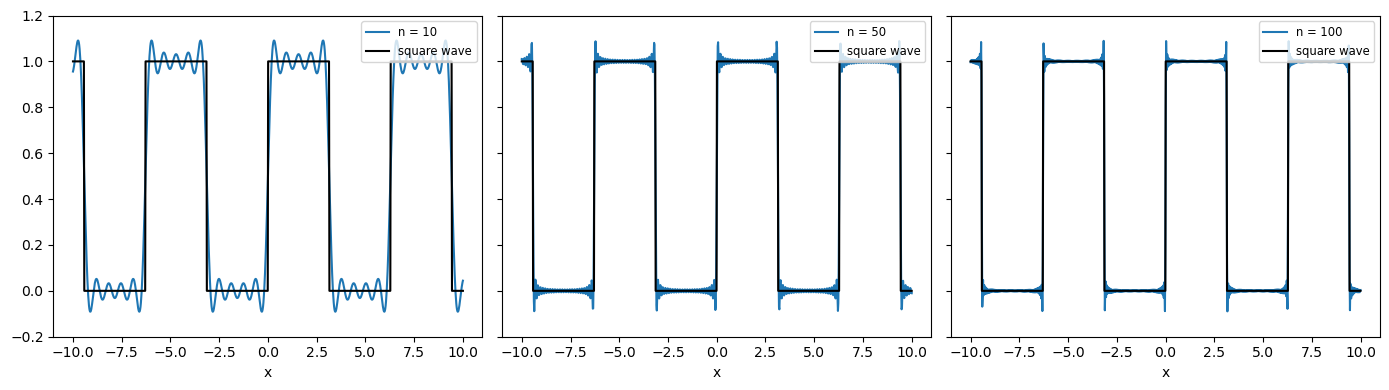

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14,4), sharey=True)

# Loop over each subplot
for idx, i in enumerate([10, 50, 100]):
    ax = axes[idx]
    ax.plot(x, fourier(i, x), label="n = %g" % (i))
    ax.plot(x, square(x, 2*np.pi), color="black", label="square wave")
    ax.legend(loc="upper right", fontsize="small")
    ax.set_xlabel("x")
    ax.set_ylim(-0.2, 1.2)
    
plt.tight_layout()
plt.show()